In [1]:
import os
from time import time
import xarray as xr

In [2]:
def _get_year_day(product, tif):
    fn = tif.split('/')[-1]
    fn = fn.replace(product,'')
    fn = fn.replace('.tif','')
    print(fn)
    return fn

In [3]:
def xr_build_cube_concat_ds(tif_list, product):

    start = time()
    my_da_list =[]
    year_day_list = []
    for tif in tif_list:
        #tiffile = 's3://dev-et-data/' + tif
        tiffile = tif
        print(tiffile)
        da = xr.open_rasterio(tiffile)
        #da = da.squeeze().drop(labels='band')
        #da.name=product
        my_da_list.append(da)
        tnow = time()
        elapsed = tnow - start
        print(tif, elapsed)
        year_day_list.append(_get_year_day(product, tif))

    da = xr.concat(my_da_list, dim='band')
    da = da.rename({'band':'year_day'})
    da = da.assign_coords(year_day=year_day_list)
    DS = da.to_dataset(name=product)
    return(DS)

In [4]:
def create_s3_list_of_days(main_prefix, year, input_name='srf_'):
    the_list = []
    for i in range(1,366):
        day = f'{i:03d}'
        file_object = main_prefix +os.sep+ str(year) +os.sep+ input_name + str(year) + str(day) + '.tif'
        print(file_object)
        the_list.append(file_object)
    return the_list

In [5]:
def xarray_creator(output_name):
    #working_bucket = 'dev-et-data'
    main_prefix = '/home/jovyan/data_wotje'
    years = range(1988,1989)
    #output_name = 'etasw_'
    #output_name = 'dd_'
    output_name = 'etasw_'

    year=2019
    my_tifs = create_s3_list_of_days(main_prefix, year, output_name)
    ds = xr_build_cube_concat_ds(my_tifs, output_name)
        
    return(ds)

In [6]:
out='etasw_'
DS=xarray_creator(out)

/home/jovyan/data_wotje/2019/etasw_2019001.tif
/home/jovyan/data_wotje/2019/etasw_2019002.tif
/home/jovyan/data_wotje/2019/etasw_2019003.tif
/home/jovyan/data_wotje/2019/etasw_2019004.tif
/home/jovyan/data_wotje/2019/etasw_2019005.tif
/home/jovyan/data_wotje/2019/etasw_2019006.tif
/home/jovyan/data_wotje/2019/etasw_2019007.tif
/home/jovyan/data_wotje/2019/etasw_2019008.tif
/home/jovyan/data_wotje/2019/etasw_2019009.tif
/home/jovyan/data_wotje/2019/etasw_2019010.tif
/home/jovyan/data_wotje/2019/etasw_2019011.tif
/home/jovyan/data_wotje/2019/etasw_2019012.tif
/home/jovyan/data_wotje/2019/etasw_2019013.tif
/home/jovyan/data_wotje/2019/etasw_2019014.tif
/home/jovyan/data_wotje/2019/etasw_2019015.tif
/home/jovyan/data_wotje/2019/etasw_2019016.tif
/home/jovyan/data_wotje/2019/etasw_2019017.tif
/home/jovyan/data_wotje/2019/etasw_2019018.tif
/home/jovyan/data_wotje/2019/etasw_2019019.tif
/home/jovyan/data_wotje/2019/etasw_2019020.tif
/home/jovyan/data_wotje/2019/etasw_2019021.tif
/home/jovyan/

/home/jovyan/data_wotje/2019/etasw_2019001.tif 1.1210834980010986
2019001
/home/jovyan/data_wotje/2019/etasw_2019002.tif
/home/jovyan/data_wotje/2019/etasw_2019002.tif 1.131890058517456
2019002
/home/jovyan/data_wotje/2019/etasw_2019003.tif
/home/jovyan/data_wotje/2019/etasw_2019003.tif 1.1430838108062744
2019003
/home/jovyan/data_wotje/2019/etasw_2019004.tif
/home/jovyan/data_wotje/2019/etasw_2019004.tif 1.154128074645996
2019004
/home/jovyan/data_wotje/2019/etasw_2019005.tif
/home/jovyan/data_wotje/2019/etasw_2019005.tif 1.1655962467193604
2019005
/home/jovyan/data_wotje/2019/etasw_2019006.tif
/home/jovyan/data_wotje/2019/etasw_2019006.tif 1.1767046451568604
2019006
/home/jovyan/data_wotje/2019/etasw_2019007.tif
/home/jovyan/data_wotje/2019/etasw_2019007.tif 1.1883015632629395
2019007
/home/jovyan/data_wotje/2019/etasw_2019008.tif
/home/jovyan/data_wotje/2019/etasw_2019008.tif 1.199946403503418
2019008
/home/jovyan/data_wotje/2019/etasw_2019009.tif
/home/jovyan/data_wotje/2019/etasw_

/home/jovyan/data_wotje/2019/etasw_2019070.tif 1.9512708187103271
2019070
/home/jovyan/data_wotje/2019/etasw_2019071.tif
/home/jovyan/data_wotje/2019/etasw_2019071.tif 1.963233470916748
2019071
/home/jovyan/data_wotje/2019/etasw_2019072.tif
/home/jovyan/data_wotje/2019/etasw_2019072.tif 1.9740033149719238
2019072
/home/jovyan/data_wotje/2019/etasw_2019073.tif
/home/jovyan/data_wotje/2019/etasw_2019073.tif 1.987485647201538
2019073
/home/jovyan/data_wotje/2019/etasw_2019074.tif
/home/jovyan/data_wotje/2019/etasw_2019074.tif 2.0006768703460693
2019074
/home/jovyan/data_wotje/2019/etasw_2019075.tif
/home/jovyan/data_wotje/2019/etasw_2019075.tif 2.0116963386535645
2019075
/home/jovyan/data_wotje/2019/etasw_2019076.tif
/home/jovyan/data_wotje/2019/etasw_2019076.tif 2.0233869552612305
2019076
/home/jovyan/data_wotje/2019/etasw_2019077.tif
/home/jovyan/data_wotje/2019/etasw_2019077.tif 2.035195827484131
2019077
/home/jovyan/data_wotje/2019/etasw_2019078.tif
/home/jovyan/data_wotje/2019/etasw_

/home/jovyan/data_wotje/2019/etasw_2019154.tif 2.982839345932007
2019154
/home/jovyan/data_wotje/2019/etasw_2019155.tif
/home/jovyan/data_wotje/2019/etasw_2019155.tif 2.9951205253601074
2019155
/home/jovyan/data_wotje/2019/etasw_2019156.tif
/home/jovyan/data_wotje/2019/etasw_2019156.tif 3.007192373275757
2019156
/home/jovyan/data_wotje/2019/etasw_2019157.tif
/home/jovyan/data_wotje/2019/etasw_2019157.tif 3.0186688899993896
2019157
/home/jovyan/data_wotje/2019/etasw_2019158.tif
/home/jovyan/data_wotje/2019/etasw_2019158.tif 3.0304181575775146
2019158
/home/jovyan/data_wotje/2019/etasw_2019159.tif
/home/jovyan/data_wotje/2019/etasw_2019159.tif 3.041966199874878
2019159
/home/jovyan/data_wotje/2019/etasw_2019160.tif
/home/jovyan/data_wotje/2019/etasw_2019160.tif 3.0541586875915527
2019160
/home/jovyan/data_wotje/2019/etasw_2019161.tif
/home/jovyan/data_wotje/2019/etasw_2019161.tif 3.0656261444091797
2019161
/home/jovyan/data_wotje/2019/etasw_2019162.tif
/home/jovyan/data_wotje/2019/etasw_

/home/jovyan/data_wotje/2019/etasw_2019237.tif 4.02938985824585
2019237
/home/jovyan/data_wotje/2019/etasw_2019238.tif
/home/jovyan/data_wotje/2019/etasw_2019238.tif 4.043623208999634
2019238
/home/jovyan/data_wotje/2019/etasw_2019239.tif
/home/jovyan/data_wotje/2019/etasw_2019239.tif 4.056232690811157
2019239
/home/jovyan/data_wotje/2019/etasw_2019240.tif
/home/jovyan/data_wotje/2019/etasw_2019240.tif 4.068732738494873
2019240
/home/jovyan/data_wotje/2019/etasw_2019241.tif
/home/jovyan/data_wotje/2019/etasw_2019241.tif 4.082915544509888
2019241
/home/jovyan/data_wotje/2019/etasw_2019242.tif
/home/jovyan/data_wotje/2019/etasw_2019242.tif 4.094683885574341
2019242
/home/jovyan/data_wotje/2019/etasw_2019243.tif
/home/jovyan/data_wotje/2019/etasw_2019243.tif 4.106245279312134
2019243
/home/jovyan/data_wotje/2019/etasw_2019244.tif
/home/jovyan/data_wotje/2019/etasw_2019244.tif 4.117620944976807
2019244
/home/jovyan/data_wotje/2019/etasw_2019245.tif
/home/jovyan/data_wotje/2019/etasw_201924

/home/jovyan/data_wotje/2019/etasw_2019324.tif 4.639859437942505
2019324
/home/jovyan/data_wotje/2019/etasw_2019325.tif
/home/jovyan/data_wotje/2019/etasw_2019325.tif 4.644565105438232
2019325
/home/jovyan/data_wotje/2019/etasw_2019326.tif
/home/jovyan/data_wotje/2019/etasw_2019326.tif 4.648632526397705
2019326
/home/jovyan/data_wotje/2019/etasw_2019327.tif
/home/jovyan/data_wotje/2019/etasw_2019327.tif 4.652845621109009
2019327
/home/jovyan/data_wotje/2019/etasw_2019328.tif
/home/jovyan/data_wotje/2019/etasw_2019328.tif 4.657151699066162
2019328
/home/jovyan/data_wotje/2019/etasw_2019329.tif
/home/jovyan/data_wotje/2019/etasw_2019329.tif 4.661580801010132
2019329
/home/jovyan/data_wotje/2019/etasw_2019330.tif
/home/jovyan/data_wotje/2019/etasw_2019330.tif 4.665651798248291
2019330
/home/jovyan/data_wotje/2019/etasw_2019331.tif
/home/jovyan/data_wotje/2019/etasw_2019331.tif 4.670517206192017
2019331
/home/jovyan/data_wotje/2019/etasw_2019332.tif
/home/jovyan/data_wotje/2019/etasw_20193

In [7]:
#!aws s3 ls dev-et-data/out/WOTJE/Run06_14_2021/run_wotje_06142021_o/2019/

In [8]:
DS

<xarray.Dataset>
Dimensions:   (x: 1992, y: 1166, year_day: 365)
Coordinates:
  * year_day  (year_day) <U7 '2019001' '2019002' ... '2019364' '2019365'
  * y         (y) float64 9.609 9.609 9.609 9.608 ... 9.292 9.291 9.291 9.291
  * x         (x) float64 169.8 169.8 169.8 169.8 ... 170.3 170.3 170.3 170.3
Data variables:
    etasw_    (year_day, y, x) float64 3.806 3.806 ... -2.382e+38 -2.382e+38

In [9]:
!ls ~/data_wotje/

2017  2018  2019  2020	Annual	aaalog


In [10]:
!pwd

/home/jovyan/opt/s3-sadness/00-notebooks


In [11]:
%%time
dst=DS.sel(x=169.8,y=9.609, method='nearest')

CPU times: user 0 ns, sys: 3.95 ms, total: 3.95 ms
Wall time: 14.1 ms


In [12]:
dst

<xarray.Dataset>
Dimensions:   (year_day: 365)
Coordinates:
  * year_day  (year_day) <U7 '2019001' '2019002' ... '2019364' '2019365'
    y         float64 9.609
    x         float64 169.8
Data variables:
    etasw_    (year_day) float64 3.807 3.806 3.804 3.803 ... 3.78 3.787 3.793

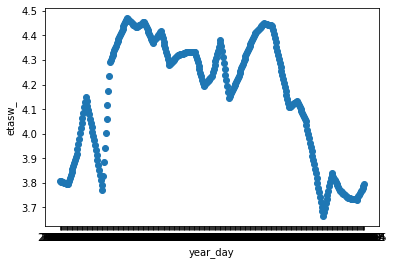

In [13]:
dst.plot.scatter(x='year_day', y='etasw_')